In [162]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cmocean
import datetime
import seaborn as sns

In [163]:
df = pd.read_csv('/Users/kyra/documents/Summer23/pCESM.3Ma_CO2_d18O_obPara.txt', delim_whitespace=True, header=None)

In [164]:
df.columns = ['Kiloyear', 'CO2','d18O from LR04','Eccentricity','Obliquity','Precession']

In [165]:
print(list(df.columns))

['Kiloyear', 'CO2', 'd18O from LR04', 'Eccentricity', 'Obliquity', 'Precession']


In [166]:
na = df.to_numpy()
time = na[0:3000, 0]
co2 = na[0:3000, 1]
d180 = na[0:3000, 2]
eccentricity = na[0:3000, 3]
obliquity = na[0:3000, 4]
precession = na[0:3000, 5]

In [167]:
ts = xr.open_dataset('/Users/kyra/documents/Summer23/shout/totimerge.nc')
ts = np.array(ts.toti).reshape(1250)
print(np.min(ts))
print(np.max(ts))
print(ts)
change = -ts + (26.5 * 10**15)
ice_mass = (0.9167) * change
sle = (ice_mass * (1/(361.8*(10**12))))
#sle = np.array(sle).reshape(1250)

2.6485165e+16
3.0904399e+16
[2.6712186e+16 2.6671199e+16 2.6666408e+16 ... 2.7909752e+16 2.7896661e+16
 2.7890852e+16]


In [168]:
ts2 = xr.open_dataset('/Users/kyra/documents/Summer23/nhout/totimerged.nc')
ts2 = ts2.toti
print(ts2)
change2 = -ts2 + (2.9 * 10**15)
ice_mass2 = (0.9167) * change2
sle2 = ((ice_mass2 * (1/(361.8*(10**12)))))
#print(sle2)
new_sle2 = np.array(sle2).reshape(1250)
new_sle2 += sle

<xarray.DataArray 'toti' (time: 1250)>
[1250 values with dtype=float32]
Coordinates:
  * time     (time) float32 200.0 200.0 300.0 ... 1.248e+05 1.249e+05 1.25e+05
Attributes:
    long_name:       ice volume
    units:           m3
    FORTRAN_format:  e13.5


In [169]:
# ts_time = ts.time
# #print(ts)
# sle_time = np.array(ts_time).reshape(1250)

# ts2_time = ts2.time
# #print(ts)
# print(ts2_time)
# sle2_time = np.array(ts2_time).reshape(1250)
# sle2_time += sle_time

In [170]:
import numpy as np
import matplotlib.pyplot as plt

def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()
    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (kyr)')
    ax1.invert_xaxis()
    ax2.plot(time, data2, color=c2)
    plt.tight_layout()
    return ax1, ax2

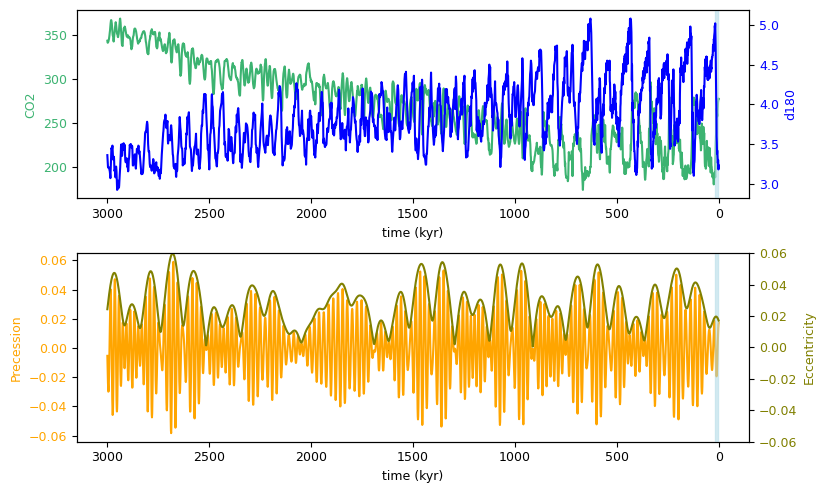

In [178]:
#Create axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8,5))

ax1, ax1a = two_scales(ax1, time, co2, d180, 'mediumseagreen', 'b')
ax1.set_ylabel('CO2',color='mediumseagreen')
ax1a.set_ylabel('d180',color='b')
plt.axvspan(21, 6, color='lightblue', alpha=0.5)

ax2, ax2a = two_scales(ax2, time, precession, eccentricity, 'orange', 'olive')
ax2.set_ylabel('Precession',color='orange')
ax2a.set(ylim=(-0.06, 0.06))
ax2a.set_ylabel('Eccentricity',color='olive')
plt.axvspan(21, 6, color='lightblue', alpha=0.5)

def color_y_axis(ax, color):
    for t in ax.get_yticklabels():
        t.set_color(color)

color_y_axis(ax1, 'mediumseagreen')
color_y_axis(ax1a, 'b')
color_y_axis(ax2, 'orange')
color_y_axis(ax2a, 'olive')

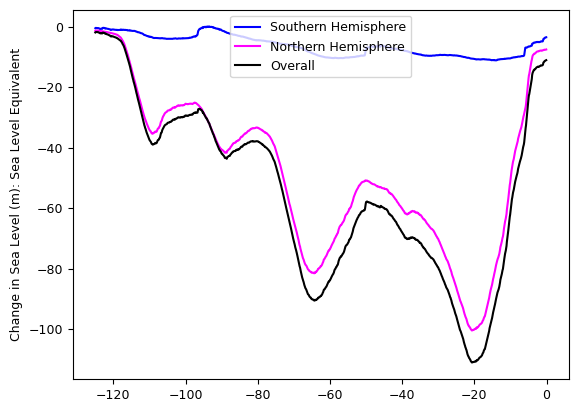

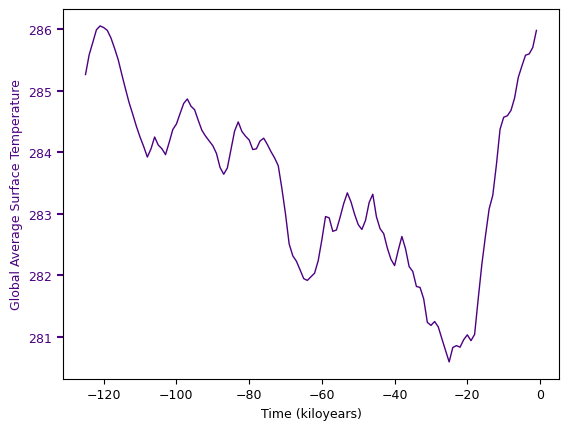

In [160]:
####
sle = np.array(sle).reshape(1250)

fig, ax = plt.subplots()

plt.ylabel('Change in Sea Level (m): Sea Level Equivalent')
plt.rcParams.update({'font.size': 9})

a = []

for i in range(-1250, 0):
    a.append(i)

a = np.array(a)

line1, = plt.plot(a/10, sle, label='Southern Hemisphere', color='blue')
line2, = plt.plot(a/10, sle2, label='Northern Hemisphere', color='magenta')
line3, = plt.plot(a/10, new_sle2,label='Overall', color='black')
leg = plt.legend(loc='upper center')

plt.show()

#####
ds = xr.open_dataset('/Users/kyra/documents/Summer23/gm.nc')
ts = ds.TS

fig, ax = plt.subplots()

ts = np.array(ts).reshape(3001)

time = []
for i in range(-125,0):
    time.append(i)

ts = ts[2875:3000]

p1, = ax.plot(time, ts, 'indigo', label="Global Average Surface Temperature", linewidth = 1)
ax.set_xlabel("Time (kiloyears)")
ax.set_ylabel("Global Average Surface Temperature")

ax.yaxis.label.set_color(p1.get_color())
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
plt.show()